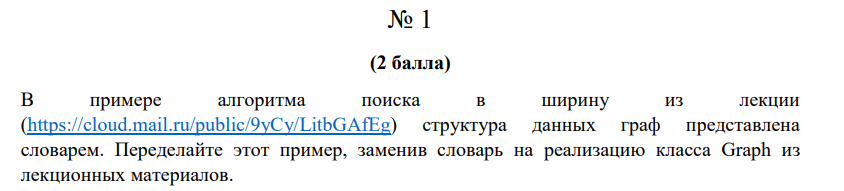

In [ ]:
class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_vertex(self, vertex):
        if vertex not in self.vertices:
            self.vertices[vertex] = []
    
    def add_edge(self, from_vertex, to_vertex):
        if from_vertex not in self.vertices:
            self.add_vertex(from_vertex)
        if to_vertex not in self.vertices:
            self.add_vertex(to_vertex)
        self.vertices[from_vertex].append(to_vertex)
    
    def get_neighbors(self, vertex):
        return self.vertices.get(vertex, [])
    
    def vertices_print(self):
        return str(self.vertices)

def person_is_seller(name):
    return name[0] == 'a'


graph = Graph()

graph.add_edge("you", "alice")
graph.add_edge("you", "bob")
graph.add_edge("you", "claire")
graph.add_edge("bob", "anuj")
graph.add_edge("bob", "peggy")
graph.add_edge("alice", "peggy")
graph.add_edge("claire", "thom")
graph.add_edge("claire", "jonny")

graph.add_vertex("anuj")
graph.add_vertex("peggy")
graph.add_vertex("thom")
graph.add_vertex("jonny")

def search(name):
    search_queue = deque()
    search_queue += graph.get_neighbors(name)
    searched = set()
    
    while search_queue:
        person = search_queue.popleft()
        if person not in searched:
            if person_is_seller(person):
                print(person + " is a mango seller!")
                return True
            else:
                search_queue += graph.get_neighbors(person)
                searched.add(person)
    return False

search("you")

print(graph.vertices_print())

alice is a mango seller!
{'you': ['alice', 'bob', 'claire'], 'alice': ['peggy'], 'bob': ['anuj', 'peggy'], 'claire': ['thom', 'jonny'], 'anuj': [], 'peggy': [], 'thom': [], 'jonny': []}


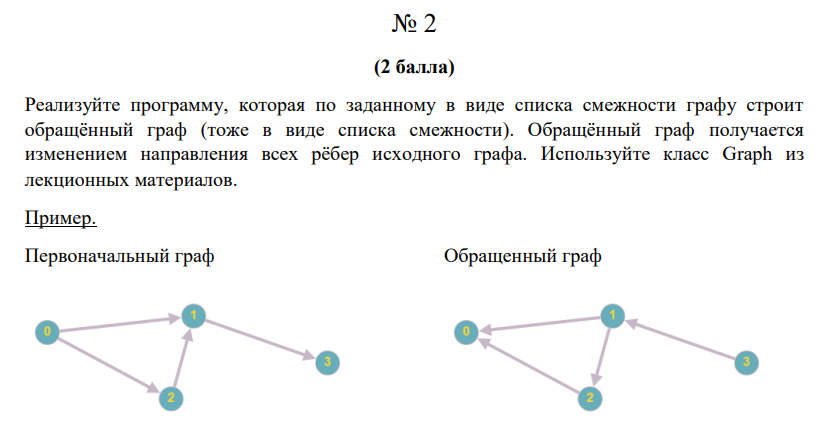

In [ ]:
class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_vertex(self, vertex):
        if vertex not in self.vertices:
            self.vertices[vertex] = []
    
    def add_edge(self, from_vertex, to_vertex):
        if from_vertex not in self.vertices:
            self.add_vertex(from_vertex)
        if to_vertex not in self.vertices:
            self.add_vertex(to_vertex)
        self.vertices[to_vertex].append(from_vertex) # поменяем адресатов для обращенного графа
    
    def get_neighbors(self, vertex):
        return self.vertices.get(vertex, [])
    
    def vertices_print(self):
        return str(self.vertices)


graph = Graph()

graph.add_edge("you", "alice")
graph.add_edge("you", "bob")
graph.add_edge("you", "claire")
graph.add_edge("bob", "anuj")
graph.add_edge("bob", "peggy")
graph.add_edge("alice", "peggy")
graph.add_edge("claire", "thom")
graph.add_edge("claire", "jonny")

graph.add_vertex("anuj")
graph.add_vertex("peggy")
graph.add_vertex("thom")
graph.add_vertex("jonny")


print(graph.vertices_print())


{'you': [], 'alice': ['you'], 'bob': ['you'], 'claire': ['you'], 'anuj': ['bob'], 'peggy': ['bob', 'alice'], 'thom': ['claire'], 'jonny': ['claire']}


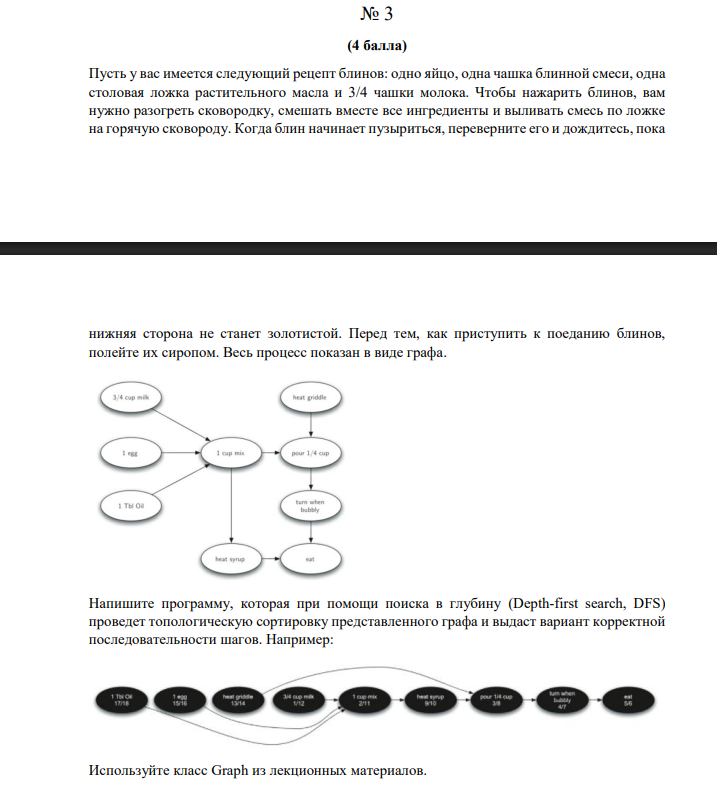

In [ ]:
class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_vertex(self, vertex):
        if vertex not in self.vertices:
            self.vertices[vertex] = []
    
    def add_edge(self, from_vertex, to_vertex):
        if from_vertex not in self.vertices:
            self.add_vertex(from_vertex)
        if to_vertex not in self.vertices:
            self.add_vertex(to_vertex)
        self.vertices[from_vertex].append(to_vertex) 
    
    def get_neighbors(self, vertex):
        return self.vertices.get(vertex, [])
    
    def vertices_print(self):
        return str(self.vertices)
    
    def dfs_topological_sort(self):
        visited = set()
        stack = []
        
        def dfs(vertex):
            visited.add(vertex)
            for neighbor in self.get_neighbors(vertex):
                if neighbor not in visited:
                    dfs(neighbor)
            stack.append(vertex)
        
        for vertex in list(self.vertices.keys()):
            if vertex not in visited:
                dfs(vertex)
        
        return stack[::-1]  
    

graph = Graph()
graph.add_edge("3/4 cup milk", "1 cup mix")
graph.add_edge("1 egg", "1 cup mix")
graph.add_edge("1 Tbl Oil", "1 cup mix")
graph.add_edge("1 cup mix", "heat syrup")
graph.add_edge("1 cup mix", "pour 1/4 cup")

graph.add_edge("heat griddle", "pour 1/4 cup")

graph.add_edge("pour 1/4 cup", "turn when bubbly")

graph.add_edge("turn when bubbly", "eat")
graph.add_edge("heat syrup", "eat")

sorted_steps = graph.dfs_topological_sort()

for i, step in enumerate(sorted_steps, 1):
    print(f"{i}. {step}")

Корректная последовательность шагов для приготовления блинов:
1. heat griddle
2. 1 Tbl Oil
3. 1 egg
4. 3/4 cup milk
5. 1 cup mix
6. pour 1/4 cup
7. turn when bubbly
8. heat syrup
9. eat


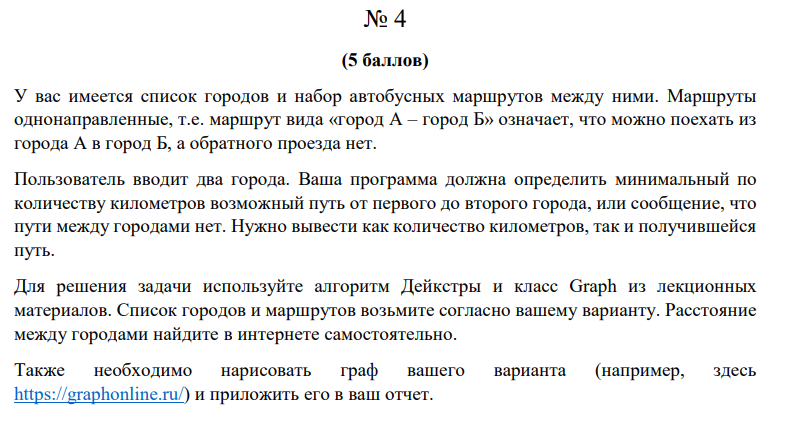

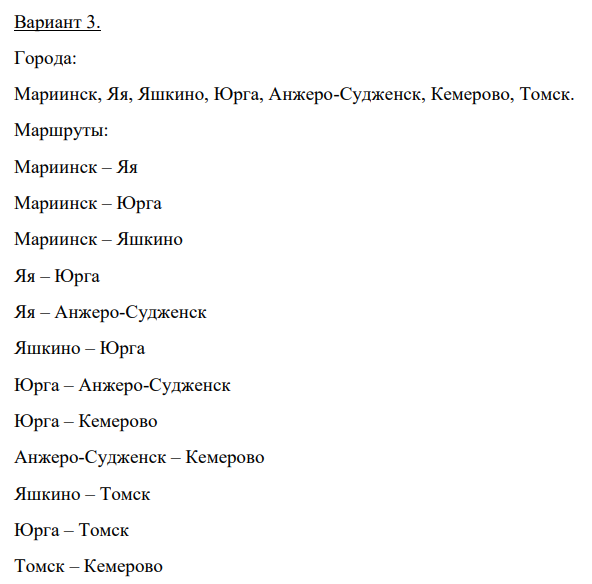

In [1]:
import heapq

class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_edge(self, from_vertex, to_vertex, weight):
        if from_vertex not in self.vertices:
            self.vertices[from_vertex] = {}
        if to_vertex not in self.vertices:
            self.vertices[to_vertex] = {}
        self.vertices[from_vertex][to_vertex] = weight
    
    def dijkstra(self, start, end):
        distances = {vertex: float('inf') for vertex in self.vertices}
        distances[start] = 0
        previous = {}
        queue = [(0, start)]
        
        while queue:
            current_dist, current_vertex = heapq.heappop(queue)
            
            if current_vertex == end:
                break
                
            if current_dist > distances[current_vertex]:
                continue
                
            for neighbor, weight in self.vertices[current_vertex].items():
                dist = current_dist + weight
                if dist < distances[neighbor]:
                    distances[neighbor] = dist
                    previous[neighbor] = current_vertex
                    heapq.heappush(queue, (dist, neighbor))
        
        if distances[end] == float('inf'):
            return None, None
            
        path = []
        current = end
        while current:
            path.append(current)
            current = previous.get(current)
        path.reverse()
        
        return distances[end], path

def create_graph():
    graph = Graph()
    
    graph.add_edge("Мариинск", "Яя", 113)
    graph.add_edge("Мариинск", "Юрга", 256)
    graph.add_edge("Мариинск", "Яшкино", 220)
    graph.add_edge("Яя", "Юрга", 146)
    graph.add_edge("Яя", "Анжеро-Судженск", 35)
    graph.add_edge("Яшкино", "Юрга", 49)
    graph.add_edge("Юрга", "Анжеро-Судженск", 139)
    graph.add_edge("Юрга", "Кемерово", 98)
    graph.add_edge("Анжеро-Судженск", "Кемерово", 103)
    graph.add_edge("Яшкино", "Томск", 150)
    graph.add_edge("Юрга", "Томск", 105)
    graph.add_edge("Томск", "Кемерово", 213)
    
    return graph

graph = create_graph()

start = input("Откуда: ")
end = input("Куда: ")

distance, path = graph.dijkstra(start, end)

if distance is None:
    print("Пути нет")
else:
    print(f"Расстояние: {distance} км")
    print(f"Путь: {' -> '.join(path)}")

Расстояние: 138 км
Путь: Яя -> Анжеро-Судженск -> Кемерово


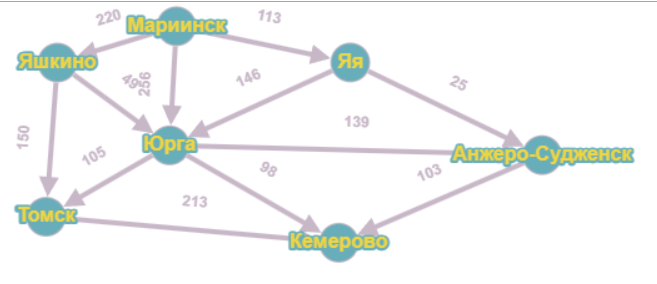